### <p style="text-align: right;"> &#9989; Jacob Jensen

# Day 15 Pre-class Assignment: Visualizing data with Seaborn and using masks in NumPy

<img src="https://seaborn.pydata.org/_images/scatterplot_matrix.png" width=500px>

## Goals for today's pre-class assignment

* Use the seaborn module to visualize data
* Practice using masks with NumPy arrays

## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  If you run into issues with your code, make sure to use Slack to help each other out and receive some assistance from the instructors. Submission instructions can be found at the end of the notebook.

### Useful reference

For this pre-class assignment, you may find parts of the seaborn tutorial page useful:

* https://seaborn.pydata.org/tutorial.html


---
## Part 1: Visualizing data with Seaborn

When doing data science, visualizing your results can often be just as important as doing the analysis. Afterall, if you can't communicate your results effectively, what good was all the work that you did?

Thus far in the course we've use standard matplotlib functions to visualize our results, but there is a handy package called Seaborn that tries to improve upon the basic aesthetics of matplotlib while also adding some specific functionality for doing statistical analysis of data.

In this assignment, you're going to test out how to use seaborn to make plots and change the way they look.

There first thing we need to do is import the `seaborn` module:

In [1]:
# Import matplotlib and make sure plots will show up in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn  ("sns" is the commonly used variable name for seaborn)
import seaborn as sns

Of course, if we want to make some nice new visualizations, we need some data to plot. Let's revisit the Great Lakes data from a previous in-class assignment! However, instead of loading the .csv files with NumPy, let's use Pandas!

In [2]:
# import pandas
import pandas as pd

# Load up the Lake Ontario data
# (remember, you need to have a copy of the data in the same location as this notebook)
ont = pd.read_csv("ont.csv")
ont.head()

,Lake Ontario annual averages,AnnAvg,Unnamed: 2,Unnamed: 3
0,1860,75.046167,NaN,1860-1917 levels are Oswego; 1918-present lake...
1,1861,75.232917,NaN,NaN
2,1862,75.238417,NaN,NaN
3,1863,75.113833,NaN,NaN
4,1864,75.044250,NaN,NaN


Hmm, why do we have two "Unnamed" columns? Take a look at the original .csv file and determine why this is happening. Since carrying around columns that are full of "NaN"s isn't particularly useful, we're going to use Pandas to "drop" those columns and create a new dataframe that doesn't contain those columns:

In [3]:
# Drop the unnamed columns and store the new version of the dataframe
ont = ont.drop(columns=["Unnamed: 2", "Unnamed: 3"])
ont.head()

,Lake Ontario annual averages,AnnAvg
0,1860,75.046167
1,1861,75.232917
2,1862,75.238417
3,1863,75.113833
4,1864,75.044250


This looks much better! **Do the same thing with the other lake files: `eri.csv`, `sup.csv`, and `mhu.csv`. Make sure the dataframes have all of the right information in them and no undesired columns.**

**Note**: you might notice that the Lake Erie file is missing a column label and that you end up with one extra "Unnamed" column, but instead of being full of NaNs, it's the column with the actual lake levels. See if you can figure out how to rename the "Unnamed" column using the [`rename()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) function. Remember that you need to store the new dataframe that is created by the `rename` function.

In [42]:
# Put your code here for reading in the other lake files using Pandas
eri = pd.read_csv("eri.csv")
eri = eri.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
eri = eri.rename({"Unnamed: 1":"AnnAvg"}, axis = 'columns')

sup = pd.read_csv("sup.csv")
sup = sup.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
sup = sup.rename({"Unnamed: 1":"AnnAvg"}, axis = 'columns')

mhu = pd.read_csv("mhu.csv")
mhu = mhu.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
mhu = mhu.rename({"Unnamed: 1":"AnnAvg"}, axis = 'columns')
mhu.head()

,Michigan-Huron annual averages,AnnAvg
0,1860,177.335167
1,1861,177.331833
2,1862,177.316000
3,1863,177.179667
4,1864,176.995583


### Making seaborn plots

Now that you have all the data loaded up, let's try making some of the same plots we made for the Great Lakes data in class.

First, we'll make a plot of the Lake Ontario levels as a function of time:

Text(0, 0.5, 'Avg. Water Level')

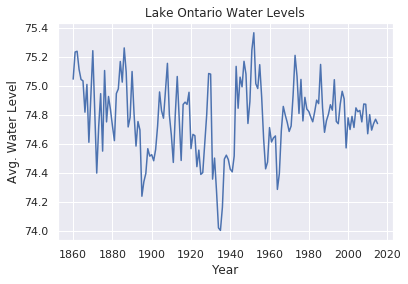

In [27]:
sns.set()
plt.plot(ont['Lake Ontario annual averages'], ont['AnnAvg'])
plt.title("Lake Ontario Water Levels")
plt.xlabel("Year")
plt.ylabel("Avg. Water Level")

You should get a plot that looks familiar but looks a bit different than a normal matplotlib plot.

**Question**: What is the `sns.set()` line doing? You might want to refer to the seaborn documentation here: https://seaborn.pydata.org/tutorial/aesthetics.html. Note that the `set()` command only needs to be called once for the effect to be applied to all future plots.

It sets the default plot values to values from seaborn, not from matplotlib

**Add some axis labels to the plot and then make similar plots for each of the Lake data files.**

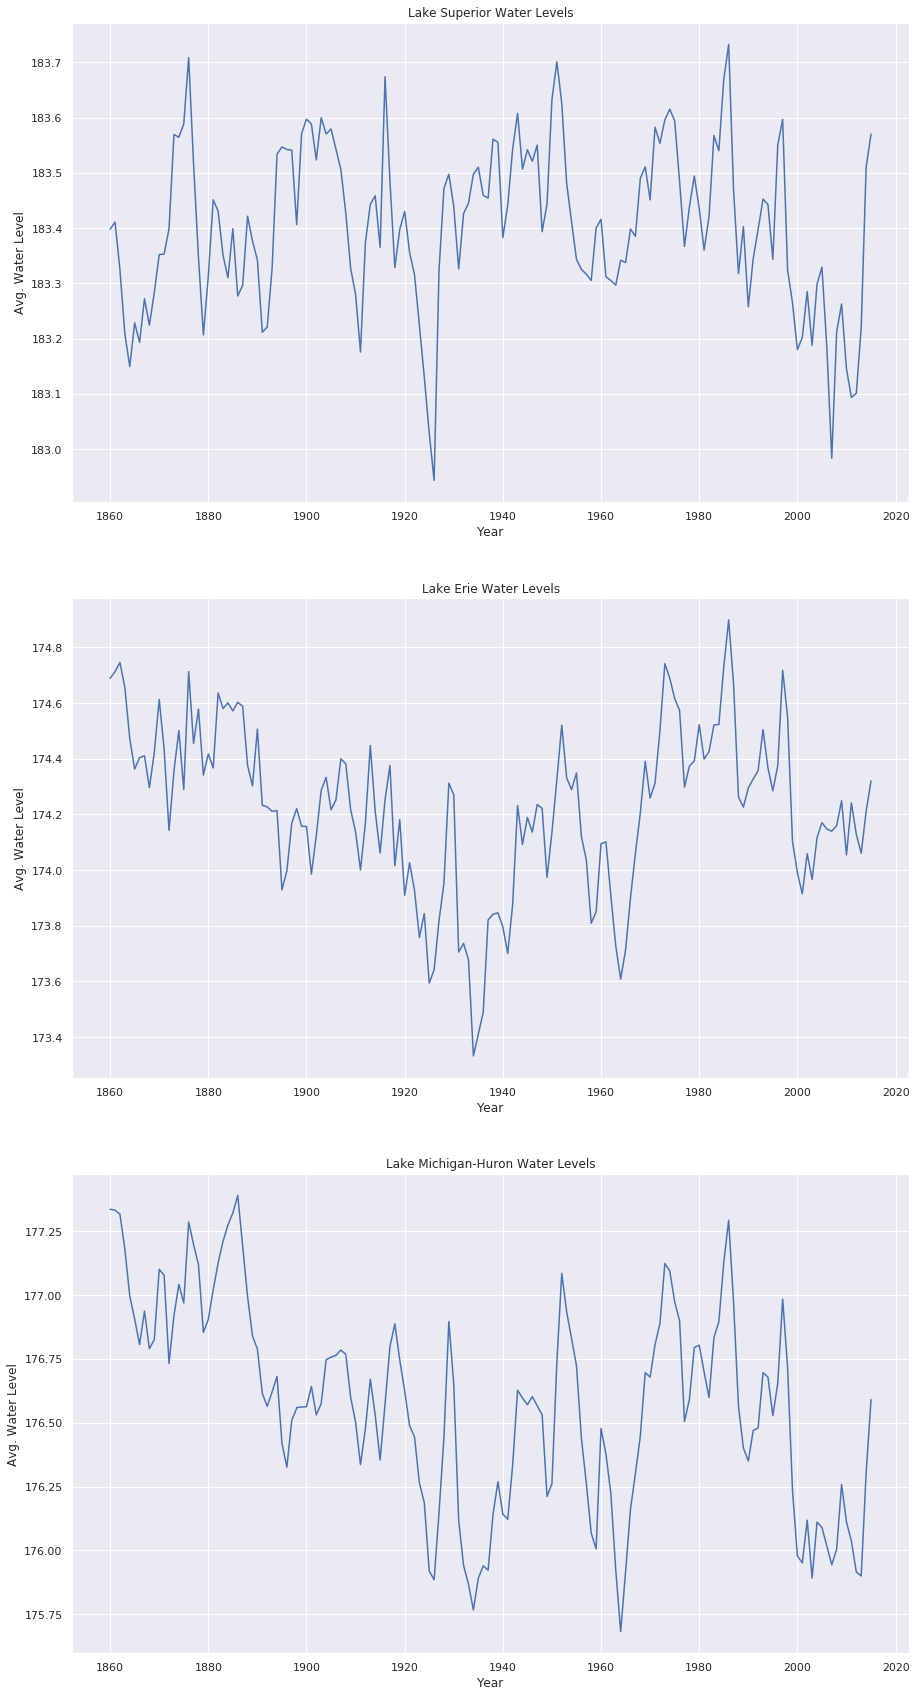

In [46]:
# Put your code here and create new cells as necessary

lakeFig, ax = plt.subplots(3,1, figsize = (15,30))

ax[0].plot(sup['Lake Superior annual averages'], sup['AnnAvg'])
ax[0].set_title("Lake Superior Water Levels")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Avg. Water Level")

ax[1].plot(eri['Lake Erie annual averages'], eri['AnnAvg'])
ax[1].set_title("Lake Erie Water Levels")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Avg. Water Level")

ax[2].plot(mhu['Michigan-Huron annual averages'], mhu['AnnAvg'])
ax[2].set_title("Lake Michigan-Huron Water Levels")
ax[2].set_xlabel("Year")
ax[2].set_ylabel("Avg. Water Level")

lakeFig.show()

Now, **make a scatter plot of the Lake Ontario levels versus the Lake Erie levels and give it appropriate axis labels.**

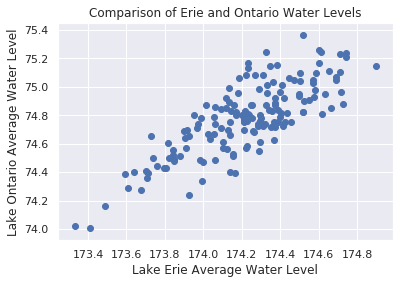

In [51]:
# Put your code here
plt.scatter(eri['AnnAvg'], ont['AnnAvg'])
plt.title('Comparison of Erie and Ontario Water Levels')
plt.xlabel('Lake Erie Average Water Level')
plt.ylabel('Lake Ontario Average Water Level')
plt.show()


It turns out that seaborn offers more than one sort of plot style and you can change the style using `set_style()`. Refer to the [documentation](https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles) to see what the different options are and then **try them out with your scatter plot**. You should also test out the `despine()` function and see what that does.

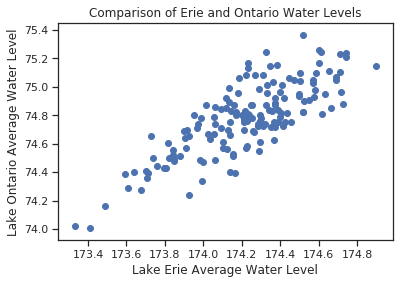

In [64]:
# Change the seaborn style here and remake your scatterplot
# test the "despine" function as well

sns.set_style('ticks')
sns.despine()

plt.scatter(eri['AnnAvg'], ont['AnnAvg'])
plt.title('Comparison of Erie and Ontario Water Levels')
plt.xlabel('Lake Erie Average Water Level')
plt.ylabel('Lake Ontario Average Water Level')
plt.show()


**Question**: Which style do you prefer? When might you use one style versus another?

When looking at distributions, no grid with a light background is good. If you want to try to show how one specific value is close to an axis value, use the grid with possibly the dark background.

Seaborn can also be really useful when you need to modify a plot to show up better in a presentation, on a poster, or in a paper. This can be done using the `set_context()` function. Refer to the [documention](https://seaborn.pydata.org/tutorial/aesthetics.html#scaling-plot-elements) and **make a new version of your scatter plot using each available context**. 

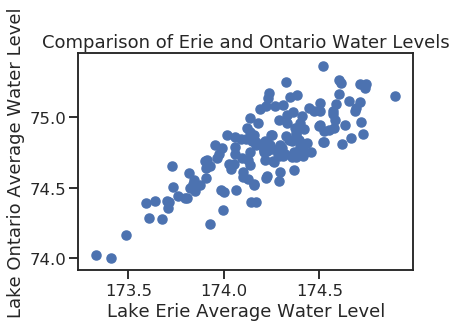

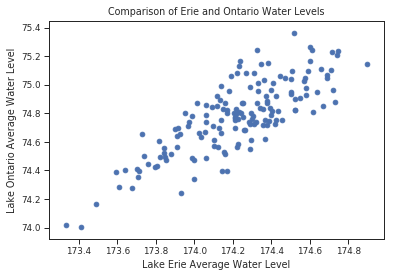

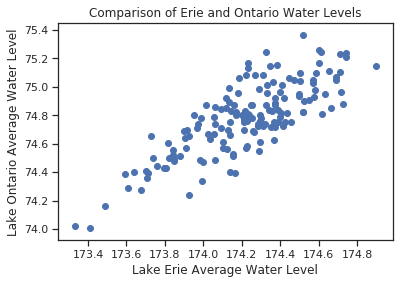

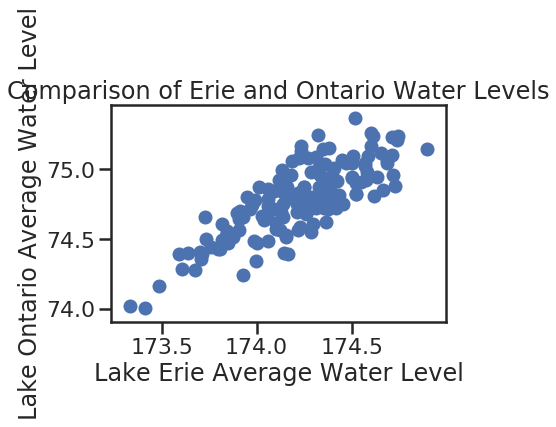

In [70]:
sns.set_context('talk')

plt.scatter(eri['AnnAvg'], ont['AnnAvg'])
plt.title('Comparison of Erie and Ontario Water Levels')
plt.xlabel('Lake Erie Average Water Level')
plt.ylabel('Lake Ontario Average Water Level')
plt.show()

sns.set_context('paper')

plt.scatter(eri['AnnAvg'], ont['AnnAvg'])
plt.title('Comparison of Erie and Ontario Water Levels')
plt.xlabel('Lake Erie Average Water Level')
plt.ylabel('Lake Ontario Average Water Level')
plt.show()


sns.set_context('notebook')

plt.scatter(eri['AnnAvg'], ont['AnnAvg'])
plt.title('Comparison of Erie and Ontario Water Levels')
plt.xlabel('Lake Erie Average Water Level')
plt.ylabel('Lake Ontario Average Water Level')
plt.show()


sns.set_context('poster')

plt.scatter(eri['AnnAvg'], ont['AnnAvg'])
plt.title('Comparison of Erie and Ontario Water Levels')
plt.xlabel('Lake Erie Average Water Level')
plt.ylabel('Lake Ontario Average Water Level')
plt.show()



Finally, as mentioned earlier, Seaborn can be used to do data analysis as well. For example, you can use the [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) function to make a scatter plot similar to the one that you just made with matplotlib, but with additional information about the distribution of the data along each axis. **Using the same data values that you used for the previous scatter plot, create a Seaborn [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)**. **Try using the `kind` argument to add a best fit line to the data.** The bars on the top and side of the plot show the histogram of the values for each lake.

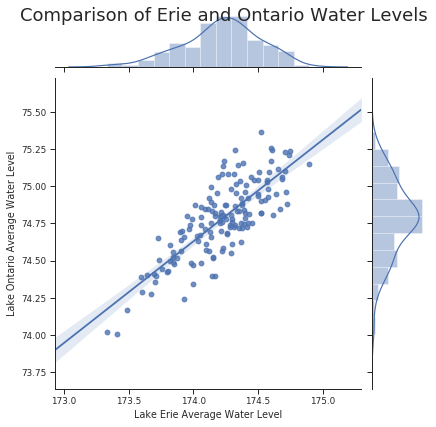

In [83]:
# Put your jointplot code here
sns.set_context('paper')

sns.jointplot(eri['AnnAvg'], ont['AnnAvg'], kind = 'reg')
plt.suptitle('Comparison of Erie and Ontario Water Levels', fontsize = 18)
plt.xlabel('Lake Erie Average Water Level')
plt.ylabel('Lake Ontario Average Water Level')
plt.show()



**Try out `jointplot` with other combinations of lake data as well**

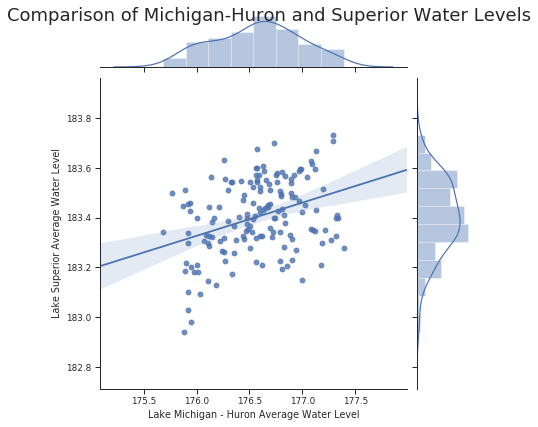

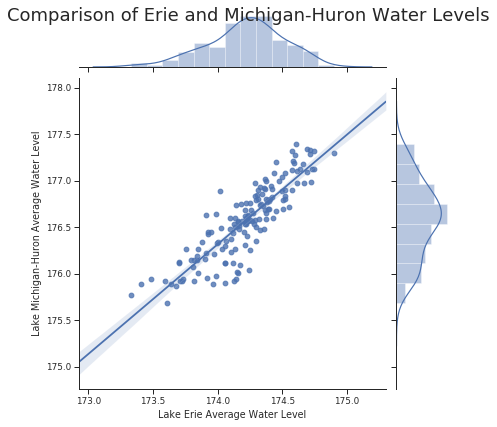

In [85]:
sns.jointplot(mhu['AnnAvg'], sup['AnnAvg'], kind = 'reg')
plt.suptitle('Comparison of Michigan-Huron and Superior Water Levels', fontsize = 18)
plt.xlabel('Lake Michigan - Huron Average Water Level')
plt.ylabel('Lake Superior Average Water Level')
plt.show()

sns.jointplot(eri['AnnAvg'], mhu['AnnAvg'], kind = 'reg')
plt.suptitle('Comparison of Erie and Michigan-Huron Water Levels', fontsize = 18)
plt.xlabel('Lake Erie Average Water Level')
plt.ylabel('Lake Michigan-Huron Average Water Level')
plt.show()

---
## Part 2: Revisiting masks in NumPy

As you're currently learning with Pandas, sometimes it can be useful to use masks to filter datasets and, as we've seen previously, these same masking tricks work with NumPy arrays. The exercises that follow should serve as a reminder for how you can use masks to interact with NumPy arrays.

The following example creates a 2D NumPy array of random values between 0 and 1 and then uses a conditional statement (`vals > 0.5`) to create a boolean mask. That mask is then used to create a new array of only the values that satisfied the conditional statement.

**Review the code and the resulting arrays and make sure you understand how the masking process works**

In [86]:
import numpy as np

# Create a 5x5 array of random number between 0 and 1
vals = np.random.random((5,5))
print(vals)

# Create a mask to locate all values greater than 0.5
mask = vals > 0.5
print(mask)

# Create a new array of values that contains just the
# number that are greater than 0.5
greater_than = vals[mask]
print(greater_than)

[[0.28169386 0.44542765 0.49214568 0.33654987 0.85789815]
 [0.59263026 0.31265622 0.45492335 0.09268509 0.51695508]
 [0.20484114 0.62540783 0.98149251 0.81916315 0.20674872]
 [0.30489925 0.77405475 0.23984836 0.97291281 0.69575379]
 [0.87926892 0.30396458 0.0895331  0.82807468 0.79736158]]
[[False False False False  True]
 [ True False False False  True]
 [False  True  True  True False]
 [False  True False  True  True]
 [ True False False  True  True]]
[0.85789815 0.59263026 0.51695508 0.62540783 0.98149251 0.81916315
 0.77405475 0.97291281 0.69575379 0.87926892 0.82807468 0.79736158]


We can actually do the same thing in a more compact way by just putting the conditional statement right inside the array brackets, like so:

In [87]:
greater_than_2 = vals[vals > 0.5]
print(greater_than_2)

[0.85789815 0.59263026 0.51695508 0.62540783 0.98149251 0.81916315
 0.77405475 0.97291281 0.69575379 0.87926892 0.82807468 0.79736158]


Using masks with arrays can also be very useful for finding values in arrays that are equal to a particular number. We can use the "`==`" operator to do this.

**Look at the following example and make sure you understand what it is doing. Add comments to explain what each line does.**

In [89]:
# Make a board of size 5 by 5 with random integers between 0 and 2
board = np.random.randint(0,3,size=(5,5))

# Print the board
print(board)

# Set a mask that will only find the 2's on the board
twos = board == 2

# Print the masked board so that the board only shows 2's
print(board[twos])

# Print out the length of the masked array
print("The total number of twos on the board is",len(board[twos]))

[[2 2 1 1 0]
 [2 1 2 2 1]
 [1 1 2 2 0]
 [2 0 1 0 1]
 [2 2 1 1 1]]
[2 2 2 2 2 2 2 2 2 2]
The total number of twos on the board is 10


What if we want to know *where* in an array a particular number is? It turns out that NumPy has a function that can figure that out for you. Not surprisingly, this is called [`np.where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) (you've might have already seen this before!).

Let's use the same type of example array as above, but this time we'll check to see "where" the value in the array is equal to 1. We can use the results of where as a mask for our array as well. **Review the code and make sure you understand what it is doing**.

In [90]:
board = np.random.randint(0,3,size=(5,5))
print(board)

indices = np.where(board == 1)
print(indices)

print(board[indices])

[[1 0 0 2 0]
 [1 1 1 0 2]
 [2 1 1 2 2]
 [1 2 0 2 1]
 [0 1 1 1 2]]
(array([0, 1, 1, 1, 2, 2, 3, 3, 4, 4, 4]), array([0, 0, 1, 2, 1, 2, 0, 4, 1, 2, 3]))
[1 1 1 1 1 1 1 1 1 1 1]


**Question**: What exactly is `np.where` returning?

It returns two arrays with the coordinates of all values in the 2D array that satisfy the condition. The first array is the row and the second is the column.

Try it for yourself! The following code creates a 2D array of integers from 0 through 9. Using that array, do the following:

1. **Write some additional code to create a mask for every element in the array that is less than or equal to 7 and print the masked array to make sure it worked.**
2. **Use `np.where` to determine which elements in the array are equal to 5. Print the resulting indices.**

In [106]:
board = np.random.randint(0,10,size=(8,8))
print(board)

lessSeven = np.where(board <= 7)

print(board[ board <= 7] )

for i in range(len(lessSeven[0])):
    print('Index {}, {} has a value less than or equal to 7'.format(lessSeven[0][i], lessSeven[1][i]))


[[5 5 7 1 5 9 8 9]
 [4 0 9 1 4 3 2 7]
 [9 7 3 8 8 4 8 0]
 [2 5 4 1 2 3 5 9]
 [9 0 6 6 7 4 2 8]
 [4 5 8 2 3 6 6 2]
 [6 9 1 3 5 2 1 6]
 [7 5 4 5 2 1 3 0]]
[5 5 7 1 5 4 0 1 4 3 2 7 7 3 4 0 2 5 4 1 2 3 5 0 6 6 7 4 2 4 5 2 3 6 6 2 6
 1 3 5 2 1 6 7 5 4 5 2 1 3 0]
Index 0, 0 has a value less than or equal to 7
Index 0, 1 has a value less than or equal to 7
Index 0, 2 has a value less than or equal to 7
Index 0, 3 has a value less than or equal to 7
Index 0, 4 has a value less than or equal to 7
Index 1, 0 has a value less than or equal to 7
Index 1, 1 has a value less than or equal to 7
Index 1, 3 has a value less than or equal to 7
Index 1, 4 has a value less than or equal to 7
Index 1, 5 has a value less than or equal to 7
Index 1, 6 has a value less than or equal to 7
Index 1, 7 has a value less than or equal to 7
Index 2, 1 has a value less than or equal to 7
Index 2, 2 has a value less than or equal to 7
Index 2, 5 has a value less than or equal to 7
Index 2, 7 has a value less than or e

Try to think about applications when masking NumPy arrays might be useful. Hopefully you'll start to see opportunities to use this handy trick as you work on new code in the course!

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [107]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

&#169; Copyright 2018,  Michigan State University Board of Trustees